<a href="https://colab.research.google.com/github/jarif87/fake-test/blob/main/Copy_of_Copy_of_Fake_News_Detection_Test_11th.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Library Imports

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
from tensorflow.python.keras.layers.pooling import MaxPool1D
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dense,Embedding,LSTM,Conv1D,MaxPool1D 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score







##Exploring Fake News

In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [ ]:
#fake=pd.read_csv("/content/gdrive/MyDrive/Fake News Detection Test/data/Fake.csv")

In [ ]:
fake=pd.read_csv("https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/Fake.csv")

In [ ]:
fake.shape

(23481, 4)

In [ ]:
fake.head()


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

##Total News

In [ ]:
fake["subject"].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

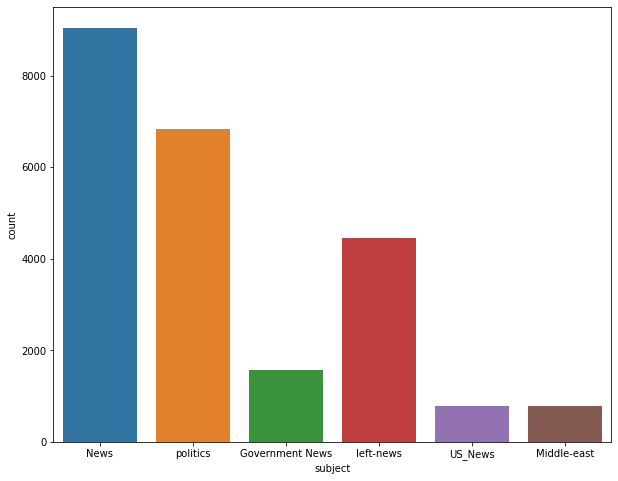

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x="subject",data=fake)

##WordCloud 

In [ ]:
fake["text"].tolist() #fake text convert to list

['Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t e

In [ ]:
text=" ".join(fake["text"].tolist())

In [ ]:
" ".join(["this","is","a","book"])

'this is a book'

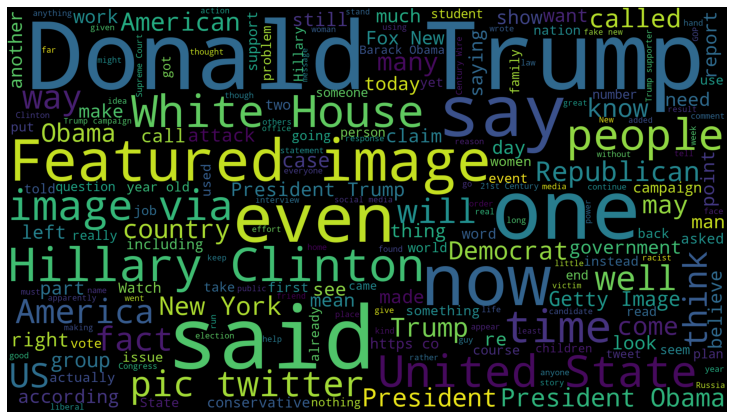

In [ ]:
wordcloud=WordCloud(width=1920,height=1080).generate(text)
fig=plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


## Exploring Real News

In [ ]:
real=pd.read_csv("https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/True.csv")

In [ ]:
#real=pd.read_csv("/content/gdrive/MyDrive/Fake News Detection Test/data/True.csv")

In [ ]:
real.shape

(21417, 4)

In [ ]:
text=" ".join(real["text"].tolist())

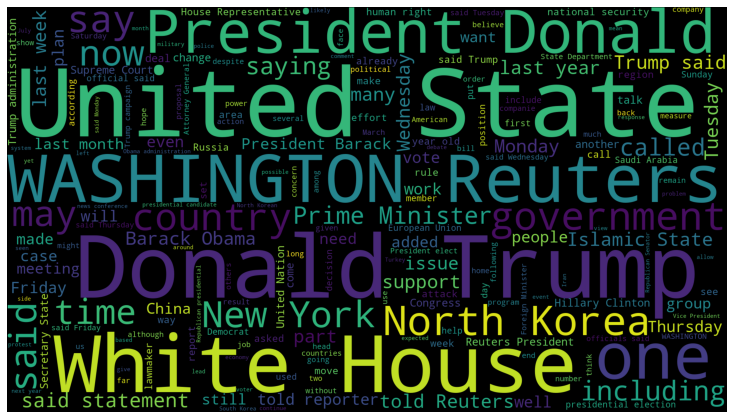

In [ ]:
wordcloud=WordCloud(width=1920,height=1080).generate(text)
fig=plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


Difference in Text

Real news seems to have source of publication which is not present in fake news set Looking at the data:

          *  most of text contains reuters information such as "WASHINGTON(Reuters)"

          *  Some texts are tweets from Twitter.

          *   Few text do not contain any publication  info.










##Clearing Data

Removing Reuters or Twitter information from the text


 *  Text  can be splitted only once at  "-" which is always present after mentioning source of publication,this gives us publication part and text part.



*   if we do not get text part this means publication details wasn't given for the record








   *   The Twitter tweets always have some source, a long text of max 259 characters







      



 

In [ ]:
real.sample(5)

,title,text,subject,date
1195,"Instead of U.S. midterms, Sanders focuses on s...",WASHINGTON (Reuters) - U.S. Senator Bernie San...,politicsNews,"October 17, 2017"
15241,Zimbabwe court grants bail to U.S. citizen cha...,HARARE (Reuters) - A high court judge in Zimba...,worldnews,"November 9, 2017"
9791,U.S. justices mull propriety of recalling disc...,WASHINGTON (Reuters) - The U.S. Supreme Court ...,politicsNews,"April 26, 2016"
13876,Beijing police detains teacher related to alle...,BEIJING (Reuters) - The police of Beijing s Ch...,worldnews,"November 25, 2017"
875,Trump supports Republican tax overhaul bill: a...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"November 2, 2017"


##Create List of Indexes Which  do not have Publication Information

In [ ]:
unknown_publishers=[]
for index,row in enumerate(real.text.values):
   try:
     record=row.split("-",  maxsplit=1)
     record[1]
     
     assert(len(record[0])<120)
   except:
    unknown_publishers.append(index)

In [ ]:
len(unknown_publishers)

222

##Text From Unknown Publishers

In [ ]:
real.iloc[unknown_publishers].text

7        The following statements were posted to the ve...
8        The following statements were posted to the ve...
12       The following statements were posted to the ve...
13       The following statements were posted to the ve...
14        (In Dec. 25 story, in second paragraph, corre...
                               ...                        
20135     (Story corrects to million from billion in pa...
20500     (This Sept 8 story corrects headline, clarifi...
20667     (Story refiles to add dropped word  not , in ...
21246     (Story corrects third paragraph to show Mosul...
21339     (Story corrects to fix spelling in paragraph ...
Name: text, Length: 222, dtype: object

In [ ]:
real.iloc[8970]

title      Graphic: Supreme Court roundup
text                                     
subject                      politicsNews
date                       June 16, 2016 
Name: 8970, dtype: object

##Drop empty Row

In [ ]:
real=real.drop(8970,axis=0)

##Extract Publisher Information from Text Data

In [ ]:
publisher=[]
temp_text=[]
for index,row in enumerate(real.text.values):
  if index in unknown_publishers:
    temp_text.append(row)
    publisher.append("unknow")
  else:
    record=row.split("-",maxsplit=1)
    publisher.append(record[0].strip())
    temp_text.append(record[1].strip())



In [ ]:
real["publisher"]=publisher
real["text"]=temp_text


In [ ]:
real.head()

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [ ]:
real.shape

(21416, 5)

##check empty Indexes

In [ ]:
empty_fake_index=[index for index,text in enumerate(fake.text.tolist()) if str(text).strip()==""]

In [ ]:
fake.iloc[empty_fake_index]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


##Merge Title and Text

In [ ]:
real["text"] =real["title"]+""+ real["text"]
fake["text"] =fake["title"]+""+ fake["text"]

##Convert Text to LOWERCASE

In [ ]:
real["text"]=real["text"].apply(lambda x:str(x).lower())
fake["text"]=fake["text"].apply(lambda x:str(x).lower())

##Preprocessing Text

In [ ]:
real["class"]=1
fake["class"]=0

In [ ]:
real.columns

Index(['title', 'text', 'subject', 'date', 'publisher', 'class'], dtype='object')

##COMBINE TEXT AND CLASS

In [ ]:
real=real[["text","class"]]

In [ ]:
fake=fake[["text","class"]]

##COMBINE FAKE AND REAL

In [ ]:
data=real.append(fake,ignore_index=True)


In [ ]:
data.sample(5)

,text,class
14150,us renews grant for clearing bombs in cambodia...,1
35550,are you one of the 20 u.s. cities targeted for...,0
3350,taking a tough stance on summer: conservatives...,1
3197,no hint of new gun control push in u.s. congre...,1
31380,senator feinstein attacks fed judge nominee’s ...,0


##FOR REMOVE SPECIAL CHARACTER WE USED KGPTALKIE PREPROCESS PACKAGE

In [ ]:
! pip install spacy==2.2.3
! python -m spacy download en_core_web_sm
! pip install beautifulsoup4==4.9.1
! pip install textblob==0.15.3
! pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

     |████████████████████████████████| 12.0 MB 5.4 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-ai11jqnl
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-ai11jqnl
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=11756 sha256=aa806c90fa74a0b9b659e114c082e26e344657f90e29519270e151df09bb36c4
  Stored in directory: /tmp/pip-ephem-wheel-cache-_70pvpoj/wheels/0d/b3/29/bfe3deffda68980088d17b81331be6667e837ffb4a071bae82
Successfully built preprocess-kgptalkie
  Attempting uninstall: preprocess-kgptalkie
    Found existing installation: preprocess-kgptalkie 0.1.3
    Uninstalling preprocess-kgptalkie-0.1.3:
      Successfully uninstalled preprocess-kgptalkie-0.1.3


In [ ]:
import preprocess_kgptalkie as ps

In [ ]:
data["text"].apply(lambda x: ps.remove_special_chars(x))

0        as us budget fight looms republicans flip thei...
1        us military to accept transgender recruits on ...
2        senior us republican senator let mr mueller do...
3        fbi russia probe helped by australian diplomat...
4        trump wants postal service to charge much more...
                               ...                        
44892    mcpain john mccain furious that iran treated u...
44893    justice yahoo settles email privacy classactio...
44894    sunnistan us and allied safe zone plan to take...
44895    how to blow 700 million al jazeera america fin...
44896    10 us navy sailors held by iranian military si...
Name: text, Length: 44897, dtype: object

In [ ]:
ps.remove_special_chars("ths is , . ! @ a book")

'ths is a book'

In [ ]:
data.head()

,text,class
0,"as u.s. budget fight looms, republicans flip t...",1
1,u.s. military to accept transgender recruits o...,1
2,senior u.s. republican senator: 'let mr. muell...,1
3,fbi russia probe helped by australian diplomat...,1
4,trump wants postal service to charge 'much mor...,1


##VECTORIZATION-WORD2VEC

Word2vec is one of the most popular technique to learn word embeddings using shallow neural network.it has developed by Tomas Mikolov in 2013 at Google.

Word embedding is the most popular representation of document vocabulary.it is capable of capturing context of a word in a document,semantic and syntactic similarity,relation with other words etc

 [Chech Here for more Details about Word2vec](https://https://jalammar.github.io/illustrated-word2vec/)
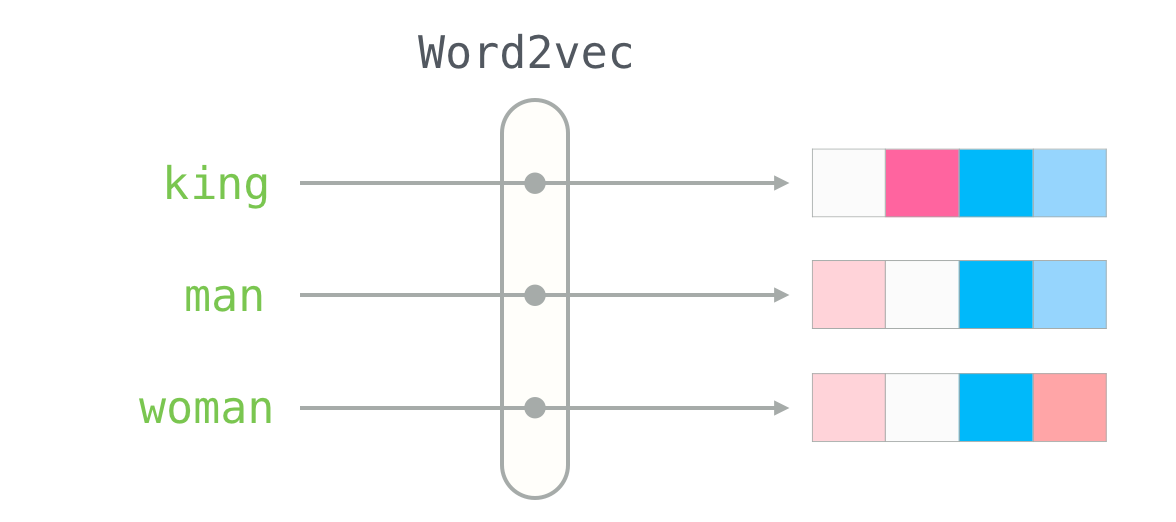






In [ ]:
import gensim

In [ ]:
y=data["class"].values

##Convert Text Data to List of List

In [ ]:
X=[d.split() for d in data["text"].tolist()]


In [ ]:
type(X)
print(X[0])

['as', 'u.s.', 'budget', 'fight', 'looms,', 'republicans', 'flip', 'their', 'fiscal', 'scriptthe', 'head', 'of', 'a', 'conservative', 'republican', 'faction', 'in', 'the', 'u.s.', 'congress,', 'who', 'voted', 'this', 'month', 'for', 'a', 'huge', 'expansion', 'of', 'the', 'national', 'debt', 'to', 'pay', 'for', 'tax', 'cuts,', 'called', 'himself', 'a', '“fiscal', 'conservative”', 'on', 'sunday', 'and', 'urged', 'budget', 'restraint', 'in', '2018.', 'in', 'keeping', 'with', 'a', 'sharp', 'pivot', 'under', 'way', 'among', 'republicans,', 'u.s.', 'representative', 'mark', 'meadows,', 'speaking', 'on', 'cbs’', '“face', 'the', 'nation,”', 'drew', 'a', 'hard', 'line', 'on', 'federal', 'spending,', 'which', 'lawmakers', 'are', 'bracing', 'to', 'do', 'battle', 'over', 'in', 'january.', 'when', 'they', 'return', 'from', 'the', 'holidays', 'on', 'wednesday,', 'lawmakers', 'will', 'begin', 'trying', 'to', 'pass', 'a', 'federal', 'budget', 'in', 'a', 'fight', 'likely', 'to', 'be', 'linked', 'to', '

##Convert word To Vector

In [ ]:
DIM=100
w2v_model=gensim.models.Word2Vec(sentences=X,size=DIM,window=10,min_count=1)

In [ ]:
len(w2v_model.wv.vocab)

399291

In [ ]:
w2v_model.wv["nice"]

array([ 1.6914624 ,  0.00946234, -2.5396838 ,  0.6396048 ,  0.07262987,
        0.3596494 ,  0.9419228 , -1.2216877 ,  3.451427  , -0.80356956,
       -0.45896527,  1.2663293 , -1.0073202 ,  0.00596395, -1.7721653 ,
        1.6534868 , -1.9913397 , -0.694904  ,  0.262615  ,  0.6810171 ,
        0.04966268, -2.1289527 ,  0.6512023 ,  0.5522179 , -1.8240343 ,
        1.4435366 , -1.6839013 ,  1.2945292 , -0.05272261,  0.82703054,
        0.4832294 , -0.19547032, -2.2136302 ,  1.6666979 , -2.225563  ,
        0.73472863, -0.6963614 ,  1.2767115 , -0.76251394, -0.797076  ,
       -1.9152787 , -2.0096488 ,  1.584775  , -2.3326268 , -0.70867306,
       -0.00588591,  0.4005242 ,  2.5397267 ,  1.5792233 ,  1.3404455 ,
       -0.63530016,  1.3903319 ,  0.3857544 ,  0.8949181 ,  0.282781  ,
       -1.8904483 , -1.9884994 ,  0.8800171 , -1.0781286 ,  0.5262138 ,
        1.5707898 , -1.2762505 , -0.87840164,  1.4846185 ,  0.86478114,
       -1.1573927 , -1.3298368 ,  0.41830745,  0.8485982 , -1.13

In [ ]:
w2v_model.wv.most_similar("bangladesh")

[('rohingya', 0.8364272713661194),
 ('bangladesh,', 0.8352001905441284),
 ('myanmar', 0.7782265543937683),
 ('myanmar,', 0.743654727935791),
 ('bangladesh.', 0.7238165140151978),
 ('rakhine,', 0.709187924861908),
 ('rohingyas', 0.6966390609741211),
 ('bangladeshi', 0.6855963468551636),
 ('600,000', 0.6836134195327759),
 ('refugees', 0.6786925196647644)]

In [ ]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(X)

In [ ]:
X=tokenizer.texts_to_sequences(X)

In [ ]:
##tokenizer.word_index

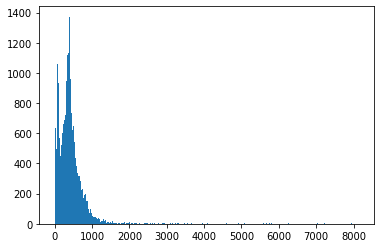

In [ ]:
plt.hist([len(x) for x in X],bins=700)
plt.show()

In [ ]:
nos=np.array([len(x) for x in X])
len(nos[nos>1000])

1593

In [ ]:
maxlen=1000
X=pad_sequences(X,maxlen=maxlen)

In [ ]:
len(X[0])

1000

In [ ]:
vocab_size=len(tokenizer.word_index)+1
vocab=tokenizer.word_index

In [ ]:
def get_weight_matrix(model):
   weight_matrix=np.zeros((vocab_size,DIM))

   for word, i in vocab.items():
       weight_matrix[i]=model.wv[word]
   return weight_matrix
  


In [ ]:
embedding_vectors=get_weight_matrix(w2v_model)

In [ ]:
embedding_vectors.shape

(399292, 100)

In [ ]:
model=Sequential()
model.add(Embedding(vocab_size,output_dim=DIM,weights=[embedding_vectors],input_length=maxlen,trainable=True))
model.add(LSTM(units=128))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["acc"])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         39929200  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 40,046,577
Trainable params: 40,046,577
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [ ]:
model.fit(X_train,y_train,validation_split=0.3,epochs=7)

Epoch 1/7
737/737 [==============================] - 147s 195ms/step - loss: 0.1221 - acc: 0.9566 - val_loss: 0.0619 - val_acc: 0.9822
Epoch 2/7
737/737 [==============================] - 149s 202ms/step - loss: 0.0446 - acc: 0.9850 - val_loss: 0.0369 - val_acc: 0.9868
Epoch 3/7
737/737 [==============================] - 143s 195ms/step - loss: 0.0144 - acc: 0.9948 - val_loss: 0.0195 - val_acc: 0.9943
Epoch 4/7
737/737 [==============================] - 143s 195ms/step - loss: 0.0092 - acc: 0.9972 - val_loss: 0.0212 - val_acc: 0.9937
Epoch 5/7
737/737 [==============================] - 143s 194ms/step - loss: 0.0084 - acc: 0.9978 - val_loss: 0.0302 - val_acc: 0.9903
Epoch 6/7
737/737 [==============================] - 143s 195ms/step - loss: 0.0054 - acc: 0.9985 - val_loss: 0.0324 - val_acc: 0.9910
Epoch 7/7
737/737 [==============================] - 144s 195ms/step - loss: 9.1090e-04 - acc: 0.9998 - val_loss: 0.0240 - val_acc: 0.9934


In [ ]:
y_pred=(model.predict(X_test) >=0.5).astype(int)

In [ ]:
accuracy_score(y_test,y_pred)

0.9941202672605791

#confussion_matrix


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)


[[5754   46]
 [  20 5405]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5800
           1       0.99      1.00      0.99      5425

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [ ]:
x=[""]
x=tokenizer.texts_to_sequences(x)
x=pad_sequences(x,maxlen=maxlen)

In [ ]:
(model.predict(x) >=0.5).astype(int)

array([[0]])